<a href="https://colab.research.google.com/github/JainAnki/ADSMI-Notebooks/blob/main/Essential_Genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project: Prediction of Essential Genes from Networks

## Learning Objectives

At the end of the mini project, you will be able to -

* Get an understanding of the dataset.
* Build and analyze Networks (or Graphs)
* Predict Essential Genes using the classification algorithm

## Information

### Background of the project

This Mini-Project is based on the research work based out of Robert Bosch Center for Data Science and Artificial Intelligence (RBCDSAI) at IIT Madras. More details can be found in this article [https://doi.org/10.3389/fgene.2021.722198](https://www.frontiersin.org/articles/10.3389/fgene.2021.722198/full).

The goal of this project is to apply machine learning to predict Essential Genes using the Protein network as the features of the STRING dataset.

### About the paper cited above

Features Used in the Paper

267 Genetic Featues + 16 Network Centrality features.

12 Centralities [1 to 12] + 4 other Auxillary network metrics

These features are computed from the graph. Once extracted, they translate the Omics-Data into a typical machine learning data, which can be further developed with Machine learning Models.


### About the Dataset

The dataset will be directly downloaded from the [String Database](https://string-db.org/cgi/download) , in a very convenient manner. 
We are downloading and working on the bacterium *Actinomyces coleocanis* as it is a small dataset suitable for the runtime and quick reruns.
[Actinomyces coleocanis](https://stringdb-static.org/download/protein.links.v11.5/525245.protein.links.v11.5.txt.gz) will be downloaded and unzipped. The text file contains 3 columns - protein1, protein2 and score.
This 3 column data is a graph data.

The Netgenes contains essential gene predictions for 2,700+ bacteria predicted using features derived from STRING protein–protein functional association networks. It contains a re fined version to access and download the data with some information as well. The dataset contains the essential genes for each bacteria. 
Clicking on the specific bacteria name will navigate to an interactive
page. 
[Netgenes Database](https://rbc-dsai-iitm.github.io/NetGenes/)


### Small note on Proteins

Proteins are large, complex molecules that play many critical roles in the body. They are necessary for building the structural components of the human body, such as muscles and organs. Proteins also determine how the organism looks, how well its body metabolises food or fights infection and sometimes even how it behaves. Proteins are chains of chemical building blocks called amino acids. A protein may contain a few amino acids or it could have several thousands.



### Small note on Genes

A gene is a basic unit of heredity in a living organism that normally resides in long strands of DNA called chromosomes. Genes are coded instructions that decide what the organism is like, how it behaves in its environment and how it survives. They hold the information to build and maintain an organism’s cells and pass genetic traits to offspring. A gene consists of a long combination of four different nucleotide bases namely adenine, cytosine, guanine and thymine.


### Relationship between GENES and PROTEINS
Gene and protein are two functionally-related entities found in the cell of an living organism.
Most genes contain the information require to make proteins. Please note Gene is not a part of Protein and vice-versa.
For more information, click [Here](https://pediaa.com/difference-between-gene-and-protein/).




### Importance of Essential Genes
Essential genes are genes required for a cell or an organism to survive. Some of the functinalities are cell growth and metabolism, cell reproduction, its well-being etc. Disruption or deletion of such genes causes cell death, indicating that these genes perform essential biological functions. A majority of the Genes in an organism are NON-ESSENTIAL. Only a small fraction are Essential.

**Python Packages used:**  
* [`networkx`](https://networkx.org/documentation/stable/_downloads/networkx_reference.pdf) for graph analysis
* [`requests`](https://docs.python-requests.org/en/latest/) for fetching data over the internet 
* [`Pandas`](https://pandas.pydata.org/docs/reference/index.html) for data frames and easy to read csv files  
* [`Numpy`](https://numpy.org/doc/stable/reference/index.html#reference) for array and matrix mathematics functions  
* [`sklearn`](https://scikit-learn.org/stable/user_guide.html) for the metrics and pre-processing
* [`seaborn`](https://seaborn.pydata.org/) and [`matplotlib`](https://matplotlib.org/) for plotting


## Importing the packages

In [ ]:
### The required libraries and packages ###
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import Counter
from operator import itemgetter
from google.colab import drive
import os
from tqdm import tqdm
import time
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import networkx as nx

## Importing the Data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'drive/MyDrive/Colab Notebooks/Healthcare_MP2_Actinomyces/'
# path = 'drive/MyDrive/<YOUR FOLDER NAME AS IT APPEARS ON GOOGLE DRIVE>'

df_raw = pd.read_csv(path+'525245.protein.links.v11.5.txt', sep = '\s')
print(df_raw.shape)
df_raw.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


(213398, 3)


,protein1,protein2,combined_score
0,525245.HMPREF0044_0001,525245.HMPREF0044_1430,635
1,525245.HMPREF0044_0001,525245.HMPREF0044_1224,170
2,525245.HMPREF0044_0001,525245.HMPREF0044_0084,164
3,525245.HMPREF0044_0001,525245.HMPREF0044_0281,165
4,525245.HMPREF0044_0001,525245.HMPREF0044_0968,165


In [ ]:
df = df_raw.copy()
df.head()

,protein1,protein2,combined_score
0,525245.HMPREF0044_0001,525245.HMPREF0044_1430,635
1,525245.HMPREF0044_0001,525245.HMPREF0044_1224,170
2,525245.HMPREF0044_0001,525245.HMPREF0044_0084,164
3,525245.HMPREF0044_0001,525245.HMPREF0044_0281,165
4,525245.HMPREF0044_0001,525245.HMPREF0044_0968,165


In [ ]:
print(f"df.shape = {df.shape}")
n_uniq_protein1 = df["protein1"].nunique()
n_uniq_protein2 = df["protein2"].nunique()
print(f"n_uniq_protein1 = {n_uniq_protein1}, n_uniq_protein2 = {n_uniq_protein2}")

df.nunique()

df.shape = (213398, 3)
n_uniq_protein1 = 1530, n_uniq_protein2 = 1530


protein1          1530
protein2          1530
combined_score     850
dtype: int64

In [ ]:
df.isnull().sum()

protein1          0
protein2          0
combined_score    0
dtype: int64

## Graded Exercises (10 points)

Exercises 1 to 4 deal with the data, the graph structure, its visualization and data preparation of **FEATURES** only.

Exercises 5 deals with linking the Feature data with the target data 

Exercise 6 deals with the classification model.

### Exercise 1 (1 point): Create the networkx graph object

**Hint** : Use the `networkx`'s function `add_weighted_edges_from`

In [ ]:
node      = df["protein1"] # First column as node
next_node = df["protein2"] # Second column as node
weight    = df["combined_score"] # Third column as edge cost/weight
tuples    = list(zip(node, next_node, weight))


g = nx.Graph()
for nth_value in tqdm(tuples):
    g.add_weighted_edges_from([nth_value])

100%|██████████| 213398/213398 [00:02<00:00, 101624.23it/s]


### Exercise 2 (2 points): Network Analysis

Provide the following Graph parameters

1. Display the information of the network, using networks using `networkx`'s    `.info`
2. Compute number of nodes, number of edges and the average degree of the network using  `networkx`'s   `.number_of_nodes `,   `.number_of_edges ` and `.degree` of each node and then taking its average`
3. Density of a network  using  `networkx`'s   `.density`
4. Compute the minimum Spanning Tree using  `networkx`'s   `.minimum_spanning_tree` and draw it using  `.spring_layout` and `.draw_networkx`
5. Determine the Diameter and Center of the graph  using  `networkx`'s   `.diameter` and `.center`
6. Visualise the degree distribution using a histogram    using  `networkx`'s   `.degree`
7. List the components in a network   using  `networkx`'s   `.connected_components`
8. Create a subrgraph   using  `networkx`'s. `.subgraph` and Print the largest Component of the network using the `max` of components
`

**Hints**: Refer to the `nx.<method>` highlighted above to achieve the respective tasks

Graph with 1530 nodes and 106699 edges
No. of nodes:  1530
No. of edeges:  106699
Average degree:  139.47581699346406
Average degree:  139.47581699346406
Network density: 0.09122028580344281
Graph with 1530 nodes and 1524 edges


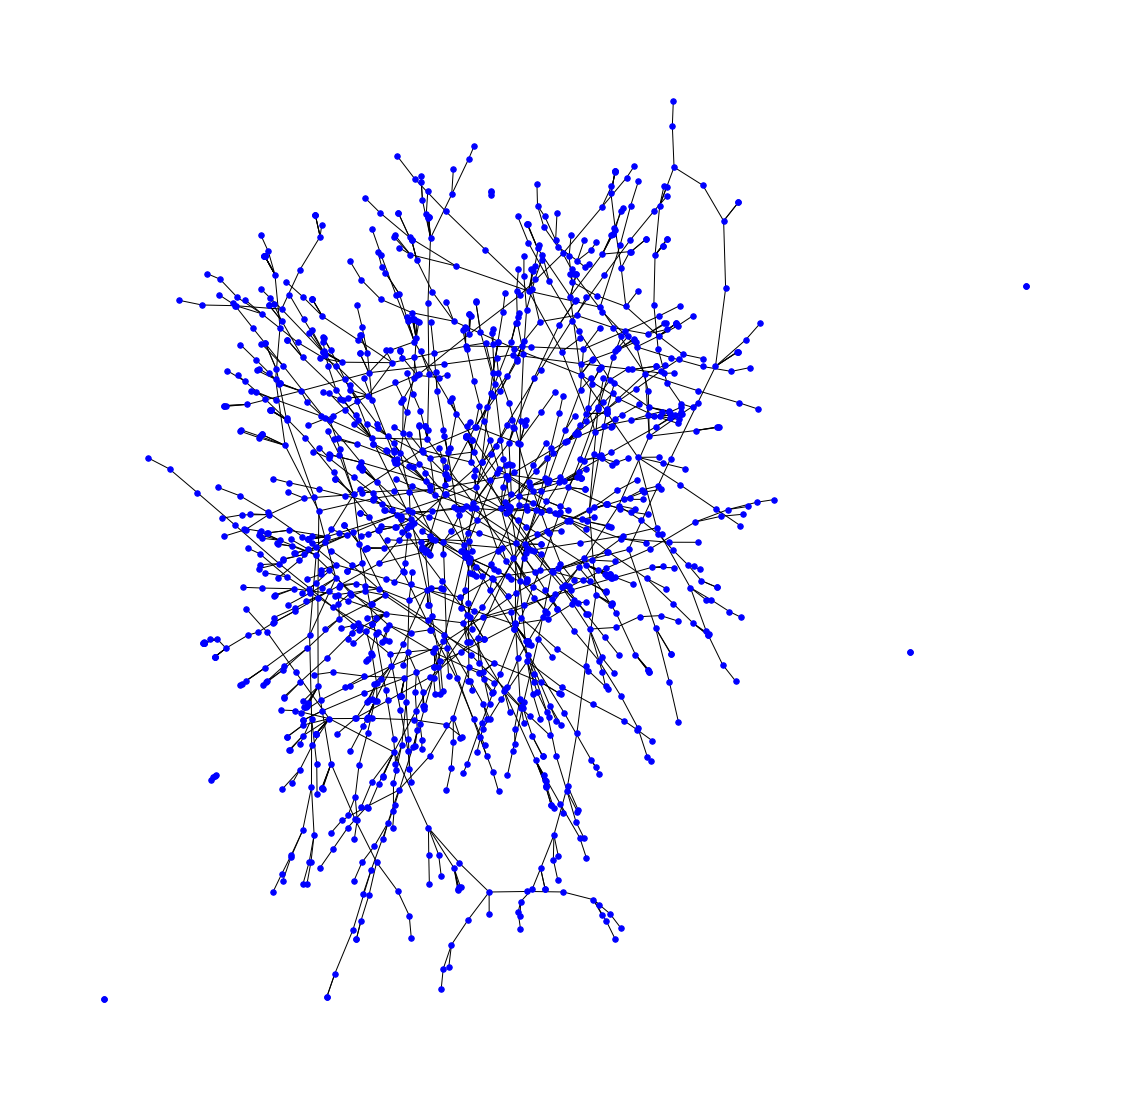

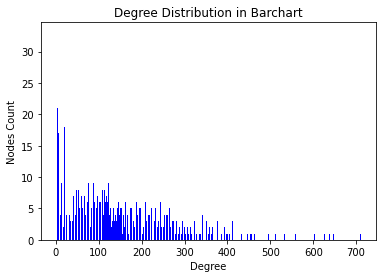

In [ ]:
#===========================================
# Compute number of nodes, number of edges and the average degree of the network
#===========================================
network_info = nx.info(g)
print(network_info)
#another solution
print('No. of nodes: ', nx.number_of_nodes(g))
print('No. of edeges: ', nx.number_of_edges(g))


degrees = [deg for (node, deg) in nx.degree(g)]  # The degrees of each node
avg_degree = sum(degrees) / float(len(degrees))
print('Average degree: ', avg_degree )
print("Average degree: ", 2 * nx.number_of_edges(g) / nx.number_of_nodes(g))
#===========================================
# Compute the density of the network
#===========================================
density = nx.density(g)
print("Network density:", density)
#===========================================
# Compute the minimum spanning tree in g and draw it.
#===========================================
T = nx.minimum_spanning_tree(g)
print(nx.info(T))
#list(T.edges(data=False))
pos = nx.spring_layout(T)
plt.figure(figsize=(20,20))
nx.draw_networkx(T, pos=pos, with_labels=False,
                 node_color='b',
                 node_size= 30 )
plt.axis('off')
#===========================================
# Draw the degree distribution histogram.
#===========================================

#take degrees from network(g)
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
#print(degree_sequence)

#count  degree frequency
degreeCount = Counter(degree_sequence)
#print(degreeCount)

#separate degree for x-axis and its counts for y-axis
deg, cnt = zip(*degreeCount.items())
#print(deg,cnt)


#create figure
fig, ax = plt.subplots()
#ax.plot(deg, cnt, 'ro-')
ax.bar(deg, cnt, width=0.70, color='b') #creates bar chart graph of degree showing no. of nodes
plt.title("Degree Distribution in Barchart")
plt.xlabel("Degree")
plt.ylabel("Nodes Count")
plt.show()
#===========================================
# Compute largest connected component of the network  (LC)
#===========================================

#lsit the components in network (g)
components = nx.connected_components(g)

#compare among components and find the one having maximun length(LC)
largest_component = max(components, key=len)
#largest_component

# Compute the Subgraph
subgraph = g.subgraph(largest_component)

### Exercise 3  (3 points): Centrality Features

Compute the Centralities

The reason we need centralities is already established in the introduction. We are generating features for the network data to transform the network data into a Machine-learning features.

For specific information, click the link adjacent to the name, or for a full list click [here](https://networkx.org/documentation/stable/reference/algorithms/centrality.html#reaching).


In the graph/network analysis, centrality measures are vital tools for understanding the networks in detail.

These algorithms use graph theory to calculate the importance of any given node in a network. They cut through noisy data, revealing parts of the network that need attention – but they all work differently. Each measure has its own definition of 'importance'. There are plenty of parameters.
However, the following network metrics are used in the paper.



1. closeness centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality),
2. betweenness centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality),
3. degree centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality),
4. eigenvector centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality),
5. subgraph centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.subgraph_centrality.html#networkx.algorithms.centrality.subgraph_centrality),
6. information centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.information_centrality.html#networkx.algorithms.centrality.information_centrality),
7. random walk betweenness centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_current_flow_betweenness_centrality.html),
8. load centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.load_centrality.html#networkx.algorithms.centrality.load_centrality),
9. harmonic centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.harmonic_centrality.html#networkx.algorithms.centrality.harmonic_centrality),
10. reaching (local) centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.local_reaching_centrality.html#networkx.algorithms.centrality.local_reaching_centrality),
11. edge clustering coefficient centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html#networkx.algorithms.cluster.average_clustering),
12. pagerank [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html),
13. clique number [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.clique.graph_clique_number.html#networkx.algorithms.clique.graph_clique_number),
14. clustering coefficient [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering),
16. average_neighbor_degree [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.average_neighbor_degree.html)

**Note**: 

- Most of the methods mentioned above return a dictionary ( key-value pairs of node_name: value)

- Some of the methods mentioned above return only 1 number, So make sure to look into the documentation as to what it returns. In that case run the method for each node.

- Some of the methods do not run citing "no connenction between nodes/ Disconneted graph".
These are intentionally given to get an understanding of the network model. If you get an error, do not use it as your feature and proceed with the rest of the tasks.

In [ ]:
# closeness centrality
centrality_closeness = nx.closeness_centrality(g)

df_centrality_closeness = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_closeness"])
df_centrality_closeness["protein1"] = list(centrality_closeness.keys())
df_centrality_closeness["centrality_closeness"] = list(centrality_closeness.values())
df_centrality_closeness = df_centrality_closeness.set_index("protein1")
df_centrality_closeness.head(2)

,centrality_closeness
protein1,
525245.HMPREF0044_0001,0.413738
525245.HMPREF0044_1430,0.405917


In [ ]:
# betweenness centrality
centrality_betweenness = nx.betweenness_centrality(g)


df_centrality_betweenness = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_betweenness"])
df_centrality_betweenness["protein1"] = list(centrality_betweenness.keys())
df_centrality_betweenness["centrality_betweenness"] = list(centrality_betweenness.values())
df_centrality_betweenness = df_centrality_betweenness.set_index("protein1")
df_centrality_betweenness.head(2)

,centrality_betweenness
protein1,
525245.HMPREF0044_0001,0.000015
525245.HMPREF0044_1430,0.000034


In [ ]:
# degree centrality
centrality_degree = nx.degree_centrality(g)

df_centrality_degree = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_degree"])
df_centrality_degree["protein1"] = list(centrality_degree.keys())
df_centrality_degree["centrality_degree"] = list(centrality_degree.values())
df_centrality_degree = df_centrality_degree.set_index("protein1")
df_centrality_degree.head(2)

,centrality_degree
protein1,
525245.HMPREF0044_0001,0.008502
525245.HMPREF0044_1430,0.011118


In [ ]:
# eigenvector centrality
centrality_eigenvector = nx.eigenvector_centrality(g)

df_centrality_eigenvector = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_eigenvector"])
df_centrality_eigenvector["protein1"] = list(centrality_eigenvector.keys())
df_centrality_eigenvector["centrality_eigenvector"] = list(centrality_eigenvector.values())
df_centrality_eigenvector = df_centrality_eigenvector.set_index("protein1")
df_centrality_eigenvector.head(2)

,centrality_eigenvector
protein1,
525245.HMPREF0044_0001,0.001075
525245.HMPREF0044_1430,0.000672


In [ ]:
# subgraph centrality
centrality_subgraph = nx.subgraph_centrality(g)

df_centrality_subgraph = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_subgraph"])
df_centrality_subgraph["protein1"] = list(centrality_subgraph.keys())
df_centrality_subgraph["centrality_subgraph"] = list(centrality_subgraph.values())
df_centrality_subgraph = df_centrality_subgraph.set_index("protein1")
df_centrality_subgraph.head(2)

,centrality_subgraph
protein1,
525245.HMPREF0044_0001,5.103081e+98
525245.HMPREF0044_1430,1.996218e+98


In [ ]:
# load centrality
centrality_load = nx.load_centrality(g)

df_centrality_load = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_load"])
df_centrality_load["protein1"] = list(centrality_load.keys())
df_centrality_load["centrality_load"] = list(centrality_load.values())
df_centrality_load = df_centrality_load.set_index("protein1")
df_centrality_load.head(2)

,centrality_load
protein1,
525245.HMPREF0044_0001,0.000022
525245.HMPREF0044_1430,0.000045


In [ ]:
# harmonic centrality
centrality_harmonic = nx.harmonic_centrality(g)


df_centrality_harmonic = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_harmonic"])
df_centrality_harmonic["protein1"] = list(centrality_harmonic.keys())
df_centrality_harmonic["centrality_harmonic"] = list(centrality_harmonic.values())
df_centrality_harmonic = df_centrality_harmonic.set_index("protein1")
df_centrality_harmonic.head(2)

,centrality_harmonic
protein1,
525245.HMPREF0044_0803,783.333333
525245.HMPREF0044_1362,818.500000


In [ ]:
# local reaching centrality

centrality_reaching = dict()

for nth_protein in tqdm(list(df["protein1"].unique())):
  centrality_reaching[nth_protein]= nx.local_reaching_centrality(g, v=nth_protein)


df_centrality_reaching = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "centrality_reaching"])
df_centrality_reaching["protein1"] = list(centrality_reaching.keys())
df_centrality_reaching["centrality_reaching"] = list(centrality_reaching.values())
df_centrality_reaching = df_centrality_reaching.set_index("protein1")
df_centrality_reaching.head(2)

100%|██████████| 1530/1530 [02:29<00:00, 10.26it/s]


,centrality_reaching
protein1,
525245.HMPREF0044_0001,0.433508
525245.HMPREF0044_0002,0.510410


In [ ]:
# pagerank
pagerank = nx.pagerank(g)

df_pagerank = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "pagerank"])
df_pagerank["protein1"] = list(pagerank.keys())
df_pagerank["pagerank"] = list(pagerank.values())
df_pagerank = df_pagerank.set_index("protein1")
df_pagerank.head(2)

,pagerank
protein1,
525245.HMPREF0044_0001,0.000152
525245.HMPREF0044_1430,0.000182


In [ ]:
# clustering coefficient
clustering = nx.clustering(g)

df_clustering = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "clustering"])
df_clustering["protein1"] = list(clustering.keys())
df_clustering["clustering"] = list(clustering.values())
df_clustering = df_clustering.set_index("protein1")
df_clustering.head(2)

,clustering
protein1,
525245.HMPREF0044_0001,0.179487
525245.HMPREF0044_1430,0.198529


In [ ]:
# average_neighbor_degree
average_neighbor_degree = nx.average_neighbor_degree(g)


df_average_neighbor_degree = pd.DataFrame(data = np.zeros([n_uniq_protein1,2]), columns=["protein1", "average_neighbor_degree"])
df_average_neighbor_degree["protein1"] = list(average_neighbor_degree.keys())
df_average_neighbor_degree["average_neighbor_degree"] = list(average_neighbor_degree.values())
df_average_neighbor_degree = df_average_neighbor_degree.set_index("protein1")
df_average_neighbor_degree.head(2)

,average_neighbor_degree
protein1,
525245.HMPREF0044_0001,157.307692
525245.HMPREF0044_1430,88.058824


### Exercise 4 (2 points): Feature Engineering and Data Preparation

 - Add the above computed values as new columns to the existing dataframe to form new features for machine learning. 
 - Remove the columns *protein2* and the *combined_score*
 - Check for the null values. Drop if any
 - Scale the values of each column
 - Check for correlations of every feature with every other using `seaborn`'s **annotated heatmap**. Drop one of the features in the pair which exhibits the correlation coefficient $r>0.9$

In [ ]:
dfs = [df_centrality_betweenness, df_centrality_harmonic, df_centrality_closeness, df_centrality_degree,
       df_centrality_eigenvector, df_centrality_load, df_centrality_reaching, df_centrality_subgraph,
       df_pagerank, df_clustering, df_average_neighbor_degree]

df_centrality_measures = pd.concat(dfs, axis=1)
df_centrality_measures.head(3)

,centrality_betweenness,centrality_harmonic,centrality_closeness,centrality_degree,centrality_eigenvector,centrality_load,centrality_reaching,centrality_subgraph,pagerank,clustering,average_neighbor_degree
protein1,,,,,,,,,,,
525245.HMPREF0044_0001,0.000015,662.833333,0.413738,0.008502,0.001075,0.000022,0.433508,5.103081e+98,0.000152,0.179487,157.307692
525245.HMPREF0044_1430,0.000034,652.500000,0.405917,0.011118,0.000672,0.000045,0.426750,1.996218e+98,0.000182,0.198529,88.058824
525245.HMPREF0044_1224,0.000718,823.500000,0.503217,0.113800,0.022264,0.000728,0.538587,2.188996e+101,0.000733,0.268952,220.660920


In [ ]:
df_centrality_measures.isnull().sum()

centrality_betweenness     0
centrality_harmonic        0
centrality_closeness       0
centrality_degree          0
centrality_eigenvector     0
centrality_load            0
centrality_reaching        0
centrality_subgraph        0
pagerank                   0
clustering                 0
average_neighbor_degree    0
dtype: int64

In [ ]:
scaler = StandardScaler().fit(df_centrality_measures)

normalized_centrality_measures = scaler.transform(df_centrality_measures)
df_centrality_measures.iloc[:,:] = normalized_centrality_measures
df_centrality_measures.head(3)

,centrality_betweenness,centrality_harmonic,centrality_closeness,centrality_degree,centrality_eigenvector,centrality_load,centrality_reaching,centrality_subgraph,pagerank,clustering,average_neighbor_degree
protein1,,,,,,,,,,,
525245.HMPREF0044_0001,-0.630139,-0.900101,-0.879388,-1.140936,-1.001967,-0.644781,-0.900101,-0.629450,-1.118152,-0.944603,-0.717796
525245.HMPREF0044_1430,-0.613244,-0.984381,-0.992468,-1.104852,-1.024955,-0.623116,-0.984381,-0.630129,-1.050699,-0.863440,-1.918968
525245.HMPREF0044_1224,0.007891,0.410317,0.414321,0.311442,0.207861,0.017025,0.410317,-0.152362,0.176411,-0.563279,0.381112


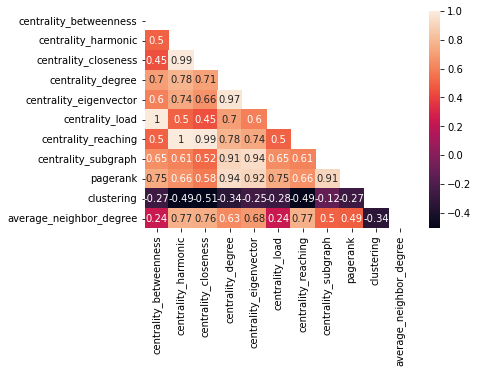

In [ ]:
# creating mask
mask = np.triu(np.ones_like(df_centrality_measures.corr()))

sns.heatmap(df_centrality_measures.corr(), annot=True, mask=mask)

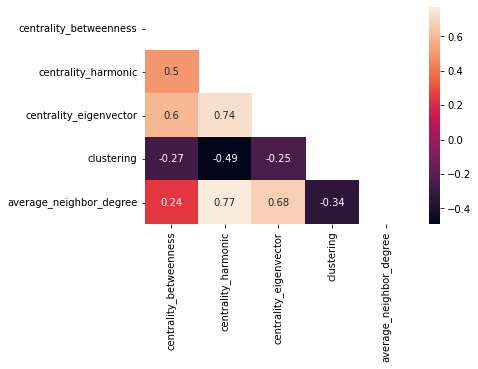

In [ ]:
df_cleaned = df_centrality_measures.copy().drop(columns=["centrality_load", "centrality_reaching", "pagerank", 
                                                         "centrality_subgraph", "centrality_degree", "centrality_closeness"])

# creating mask
mask = np.triu(np.ones_like(df_cleaned.corr()))
sns.heatmap(df_cleaned.corr(), annot=True, mask=mask)

In [ ]:
df_cleaned.head(3)

,centrality_betweenness,centrality_harmonic,centrality_eigenvector,clustering,average_neighbor_degree
protein1,,,,,
525245.HMPREF0044_0001,-0.630139,-0.900101,-1.001967,-0.944603,-0.717796
525245.HMPREF0044_1430,-0.613244,-0.984381,-1.024955,-0.863440,-1.918968
525245.HMPREF0044_1224,0.007891,0.410317,0.207861,-0.563279,0.381112


### Excerice 5 (1 Point) : Target Data

Obtain the Target Data from the file **"Actinomyces coleocanis.csv"**

In [ ]:
df_target = pd.read_csv(path + "Actinomyces_coleocanis_Essential_Genes.csv")
print(df_target.shape)
df_target.head(3)

(80, 4)


,protein1,gene_name,description,confidence_score
0,525245.HMPREF0044_0021,rpsR,30S ribosomal protein S18,98.5
1,525245.HMPREF0044_0543,rpmA,50S ribosomal protein L27,98.5
2,525245.HMPREF0044_1323,rpsD,30S ribosomal protein S4,98.4


In [ ]:
essential_genes = list(df_target["protein1"])

In [ ]:
df_cleaned = df_cleaned.reset_index()
df_cleaned.head(3)

,protein1,centrality_betweenness,centrality_harmonic,centrality_eigenvector,clustering,average_neighbor_degree
0,525245.HMPREF0044_0001,-0.630139,-0.900101,-1.001967,-0.944603,-0.717796
1,525245.HMPREF0044_1430,-0.613244,-0.984381,-1.024955,-0.863440,-1.918968
2,525245.HMPREF0044_1224,0.007891,0.410317,0.207861,-0.563279,0.381112


In [ ]:
df_cleaned["gene_essentiality"] = 0 # Non-Essential Genes
condition = df_cleaned["protein1"].isin(essential_genes)
df_cleaned["gene_essentiality"][condition] = 1 # Essential genes
df_cleaned["gene_essentiality"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    1450
1      80
Name: gene_essentiality, dtype: int64

In [ ]:
df_cleaned.head(3)

,protein1,centrality_betweenness,centrality_harmonic,centrality_eigenvector,clustering,average_neighbor_degree,gene_essentiality
0,525245.HMPREF0044_0001,-0.630139,-0.900101,-1.001967,-0.944603,-0.717796,0
1,525245.HMPREF0044_1430,-0.613244,-0.984381,-1.024955,-0.863440,-1.918968,0
2,525245.HMPREF0044_1224,0.007891,0.410317,0.207861,-0.563279,0.381112,0


### Exercise 6 (1 point) : Gene Essentiality Classification

Determine the Essential Protein using any of your favourite `sklearn`'s classifier models



In [ ]:
X = df_cleaned.iloc[:,1:-1].copy()
y = df_cleaned.iloc[:,-1].copy()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"x_train.shape={x_train.shape}, x_test.shape={x_test.shape}")
print(f"y_train.shape={y_train.shape}, y_test.shape={y_test.shape}")

x_train.shape=(1147, 5), x_test.shape=(383, 5)
y_train.shape=(1147,), y_test.shape=(383,)


In [ ]:
classifier_model = LogisticRegression()
classifier_model.fit(x_train, y_train)
y_pred = classifier_model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[361   0]
 [ 22   0]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       361
           1       0.00      0.00      0.00        22

    accuracy                           0.94       383
   macro avg       0.47      0.50      0.49       383
weighted avg       0.89      0.94      0.91       383



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
